In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [2]:
%matplotlib inline

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# matplotlib.use()     to change backend

In [6]:
matplotlib.__version__

'3.0.2'

In [7]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [8]:
plt.ion()
plt.isinteractive()

True

In [9]:
import requests 
resp = requests.get("https://restcountries.eu/rest/v2/all")
countries = pd.DataFrame(resp.json())

In [10]:
persons = pd.read_csv("persons.txt")
sales = pd.read_csv("booksales.txt")

In [11]:
persons

,Name,Age,Weight,Height,Income,Gender,Exp,Country
0,Herbert,65,75,160,550000,M,30,US
1,Mike,35,75,162,250000,M,5,AU
2,Micheal,40,65,158,200000,M,10,US
3,Judy,25,65,156,150000,F,1,UK
4,Cathy,50,68,159,230000,F,20,UK
5,Jason,32,78,168,350000,M,7,AU
6,Lisa,50,56,155,200000,F,25,US
7,Mark,40,70,160,350000,M,17,AU
8,Ammy,28,50,161,220000,F,5,UK
9,Jack,31,78,170,250000,M,7,US


In [12]:
sales

,Month,Book,City,Units
0,1,B100,VZG,10
1,2,B100,VZG,4
2,3,B100,VZG,13
3,1,B100,HYD,30
4,2,B100,HYD,40
5,3,B100,HYD,10
6,1,B200,VZG,14
7,1,B200,HYD,10
8,2,B200,HYD,15
9,3,B200,VZG,4


# Line Graph

In [13]:
# Graph for total no. of units sold for each month
df = sales.groupby("Month").sum()

In [14]:
df

,Units
Month,
1,64
2,59
3,41


(0, 100)

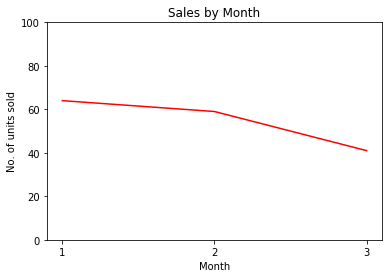

In [15]:
plt.plot(df.index, df.values,'r')
plt.xlabel("Month")
plt.ylabel("No. of units sold")
plt.title("Sales by Month")
plt.xticks([1,2,3])
plt.ylim( (0,100))

In [16]:
# Graph of avg income per country
df = persons.groupby("Country")['Income'].mean()

In [17]:
df

Country
AU    316666.666667
UK    200000.000000
US    300000.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income By Countries')

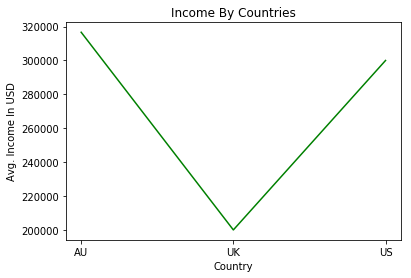

In [18]:
plt.plot(df.index, df.values,'g')
plt.xlabel("Country")
plt.ylabel("Avg. Income In USD")
plt.title("Income By Countries")

In [19]:
vzg_sales = sales.loc[ sales['City'] == 'VZG', ['Month','Units']].groupby('Month').sum()
hyd_sales = sales.loc[ sales['City'] == 'HYD', ['Month','Units']].groupby('Month').sum()

In [20]:
vzg_sales

,Units
Month,
1,24
2,4
3,17


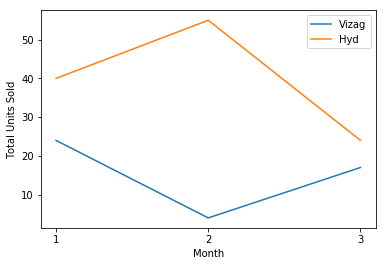

In [21]:
plt.plot([1,2,3], vzg_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.xticks([1,2,3])
# draw sales for hyd
plt.plot([1,2,3], hyd_sales.values)
plt.legend(['Vizag','Hyd'])

In [22]:
df = persons[['Country','Age']].groupby('Country').mean()

Text(0, 0.5, 'Avg. Age')

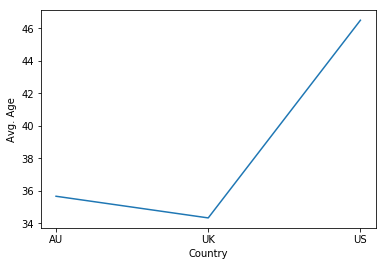

In [23]:
plt.plot(df.index, df.values)
plt.xlabel("Country")
plt.ylabel("Avg. Age")

# Histogram

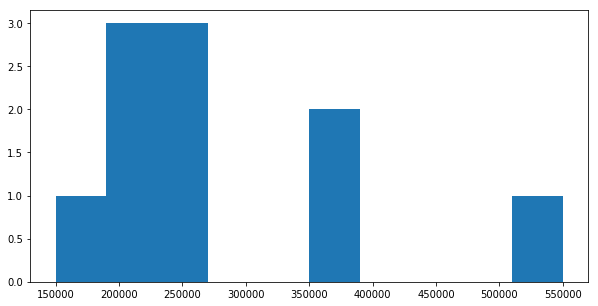

In [24]:
# draw histogram of incomes of the persons
plt.hist( persons['Income'], bins=10)
plt.gcf().set_size_inches(10,5)

(array([43.,  2.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([4.51000000e+02, 1.46603242e+07, 2.93201974e+07, 4.39800706e+07,
        5.86399438e+07, 7.32998170e+07, 8.79596902e+07, 1.02619563e+08,
        1.17279437e+08, 1.31939310e+08, 1.46599183e+08]),
 <a list of 10 Patch objects>)

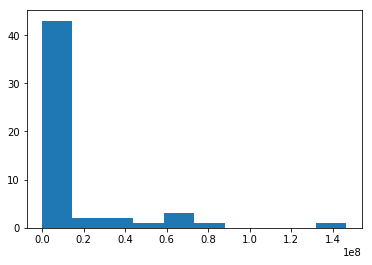

In [25]:
population = countries.loc[countries['region'] == 'Europe','population']
plt.hist(population)

(array([241.,   6.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.00000000e+00, 1.37742217e+08, 2.75484433e+08, 4.13226650e+08,
        5.50968866e+08, 6.88711083e+08, 8.26453300e+08, 9.64195516e+08,
        1.10193773e+09, 1.23967995e+09, 1.37742217e+09]),
 <a list of 10 Patch objects>)

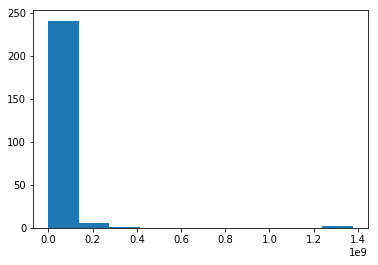

In [27]:
population = countries['population'].sort_values(ascending=False)
plt.hist(population)

# Pie chart of monthly sales

In [45]:
monthly_sales = sales.groupby('Month')['Units'].sum()
monthly_sales

Month
1    64
2    59
3    41
Name: Units, dtype: int64

([<matplotlib.patches.Wedge at 0x133c4697940>,
 [Text(0.3718186135310502, 1.035254035795972, '1'),
  Text(-0.9949506119612583, -0.46911968596288695, '2'),
  Text(0.7778174593052022, -0.7778174593052025, '3')],
 [Text(0.20281015283511827, 0.5646840195250756, '39.02'),
  Text(-0.54270033379705, -0.25588346507066556, '35.98'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00')])

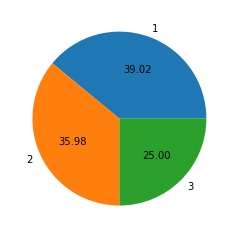

In [49]:
plt.pie(monthly_sales.values, labels= monthly_sales.index, autopct=lambda p: f"{p:5.2f}")

## Bar Graph for total sales for each book 

In [ ]:
ts = sales.groupby('Book')["Units"].sum()

In [ ]:
ts

In [ ]:
plt.bar(x=ts.index, height= ts.values)
plt.title("Units sold per book")

In [ ]:
sales

In [32]:
# Prepare data
b100 = sales.loc[sales['Book'] == 'B100', : ].groupby('Month').sum()
b200 = sales.loc[sales['Book'] == 'B200', : ].groupby('Month').sum()
b100

,Units
Month,
1,40
2,44
3,23


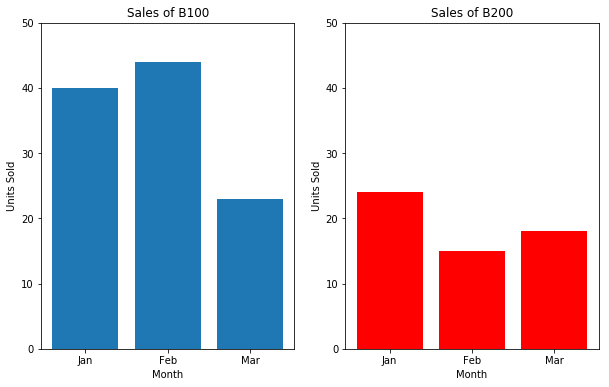

In [33]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)
#print(b100.index)
#print(b100['Units'])
ax[0].bar(x=b100.index, height=b100['Units'])
ax[0].set_title("Sales of B100")

ax[1].bar(x=b200.index, height=b200['Units'] , color='r')
ax[1].set_title("Sales of B200")

for n in range(0,2):
   ax[n].set_ylim((0,50))
   ax[n].set_xticks( (1,2,3))
   ax[n].set_xticklabels( ('Jan','Feb',"Mar"))    
   ax[n].set_ylabel("Units Sold")
   ax[n].set_xlabel("Month")

### Multiple bars in bar graph

In [29]:
s = pd.crosstab(sales['Book'], sales["City"], sales["Units"] , aggfunc=np.sum)
s

City,HYD,VZG
Book,,
B100,80,27
B200,39,18


[-0.2  0.8]
[0.2 1.2]


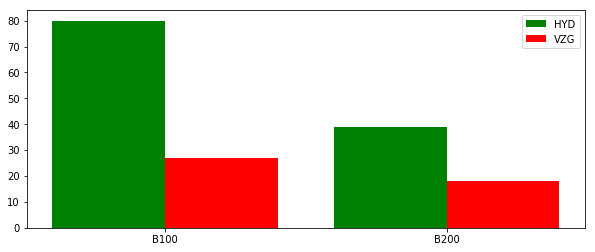

In [40]:
ind = np.arange(len(s.index))
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.bar(ind - width/2, s["HYD"] , width,  color='Green', label='HYD')
ax.bar(ind + width/2, s['VZG'], width,  color='Red', label='VZG')
ax.set_xticks(ind)
ax.set_xticklabels(s.index)
ax.legend()
print(ind - width / 2)
print(ind + width / 2)

## Stacked Bar Graph

In [41]:
s

City,HYD,VZG
Book,,
B100,80,27
B200,39,18


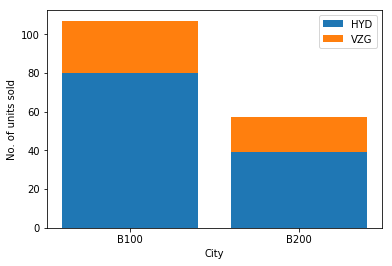

In [44]:
ax = plt.subplot()
ax.bar(x=s.index, height=s['HYD'],label="HYD")
ax.bar(x=s.index, height=s['VZG'], bottom = s["HYD"], label="B200" )
ax.set_xlabel("City")
ax.set_ylabel("No. of units sold")
ax.legend()

## Watermark

In [62]:
df = sales[['Month','Units']].groupby("Month").sum()

In [63]:
df

,Units
Month,
1,64
2,59
3,41


Text(1,50,'Srikanth Technologies')

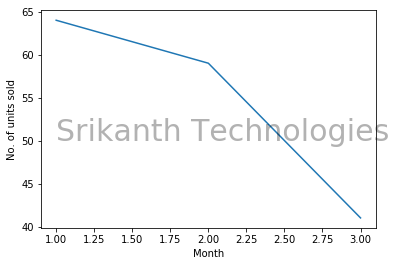

In [76]:
ax = plt.subplot()
ax.plot(df.index, df.values)
ax.set_xlabel("Month")
ax.set_ylabel("No. of units sold")
ax.text(1,50,"Srikanth Technologies", fontsize="30", alpha=0.3)

## Draw Scatter plot with regression line 

In [78]:
df = pd.read_csv("Admission.csv")

In [80]:
df.shape

(500, 9)

In [81]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [62]:
df = df.loc[:,  ['GRE Score','TOEFL Score']].head(20)

In [64]:
X = df['GRE Score']
Y = df['TOEFL Score']

In [82]:
X

480    321
481    323
482    328
483    304
484    317
485    311
486    319
487    327
488    322
489    302
490    307
491    297
492    298
493    300
494    301
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, dtype: int64

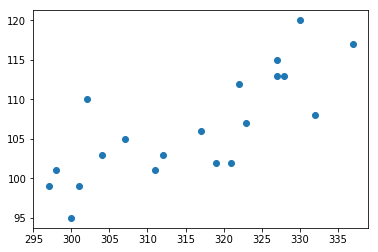

In [65]:
plt.scatter(x=X, y=Y)

In [67]:
from scipy import stats

In [68]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [69]:
line = slope * X + intercept

In [70]:
line

480    108.741006
481    109.575675
482    111.662348
483    101.646319
484    107.071668
485    104.567661
486    107.906337
487    111.245014
488    109.158341
489    100.811650
490    102.898323
491     98.724977
492     99.142312
493     99.976981
494    100.394315
495    113.331686
496    115.418359
497    112.497017
498    104.984995
499    111.245014
Name: GRE Score, dtype: float64

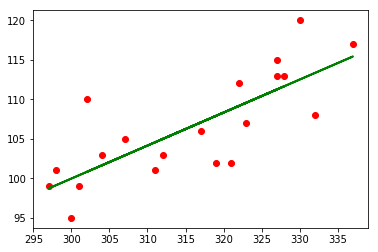

In [75]:
plt.plot(X,Y,'ro',X,line, 'g', linewidth=2)   # format is x,y, format, x,y,format , **kwargs

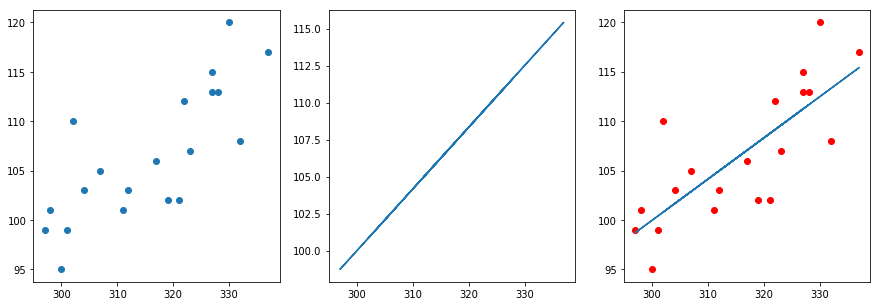

In [232]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
ax[0].scatter(X,Y)
ax[1].plot(X,line)
ax[2].plot(X,Y,'ro', X,line)

## Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x133c65efbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x133c62ebe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x133c65ef2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x133c65fca20>],
 'fliers': [<matplotlib.lines.Line2D at 0x133c6655ac8>],
 'means': [<matplotlib.lines.Line2D at 0x133c6655be0>]}

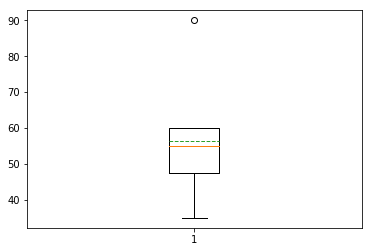

In [56]:
marks = [50,55,60,45,90,60,35]
plt.boxplot(marks, showmeans=True, meanline=True)

Text(0,0.5,'Salary PA')

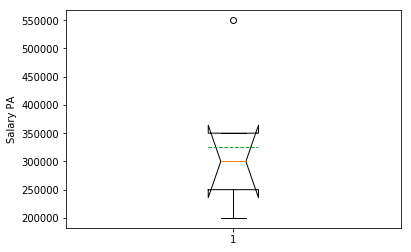

In [91]:
ax = plt.subplot()
salaries = persons.loc[ persons['Gender'] == 'M', 'Income']
ax.boxplot( salaries, meanline=True, notch=True, showmeans=True)
ax.set_ylabel("Salary PA")

Text(0, 0.5, 'Salary PA')

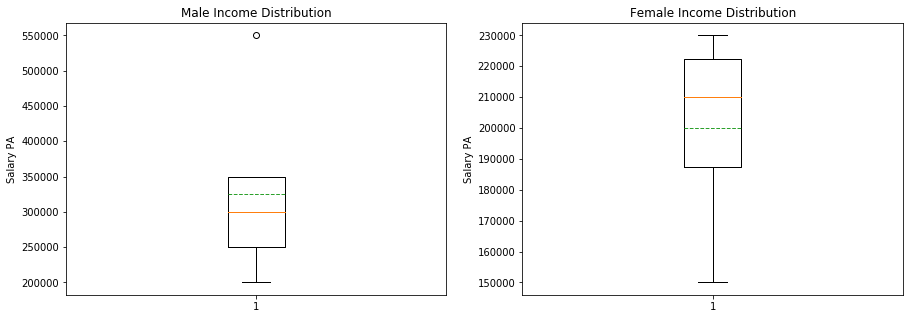

In [59]:
# Distribution of male salary and female salary
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
msalaries = persons.loc[ persons['Gender'] == 'M', 'Income']
fsalaries = persons.loc[ persons['Gender'] == 'F', 'Income']
ax[0].boxplot(msalaries, meanline=True,  showmeans=True)
ax[0].set_title("Male Income Distribution")
ax[1].boxplot( fsalaries, meanline=True,  showmeans=True)
ax[1].set_title("Female Income Distribution")
ax[0].set_ylabel("Salary PA")
ax[1].set_ylabel("Salary PA")

In [76]:
df


,GRE Score,TOEFL Score
480,321,102
481,323,107
482,328,113
483,304,103
484,317,106
485,311,101
486,319,102
487,327,115
488,322,112
489,302,110
